ARTI308 - Machine Learning
# Seaborn Overview

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.




## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Imports

In [ ]:
import seaborn as sns # sns alias for seaborn
# for jupyter notebook to render plots or charts right under the code cell it was executed in
%matplotlib inline    



## Data
Seaborn comes with built-in data sets!

In [119]:
tips = sns.load_dataset('tips') # load  build in dataset to tips

In [120]:
tips.head() # get first 5 rows of tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

<Axes: xlabel='total_bill', ylabel='Density'>

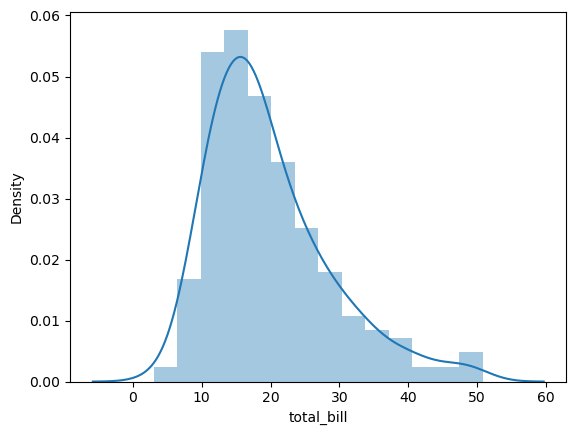

In [121]:
sns.distplot(tips['total_bill']) # shows data distribution
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

<Axes: xlabel='total_bill'>

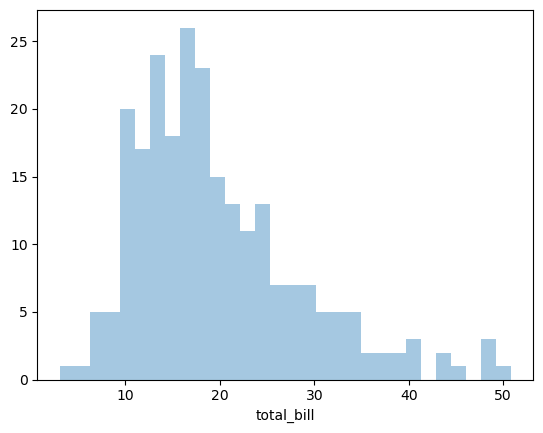

In [122]:
sns.distplot(tips['total_bill'],kde=False,bins=30) # removes kde (the curve which can estimate probability density)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

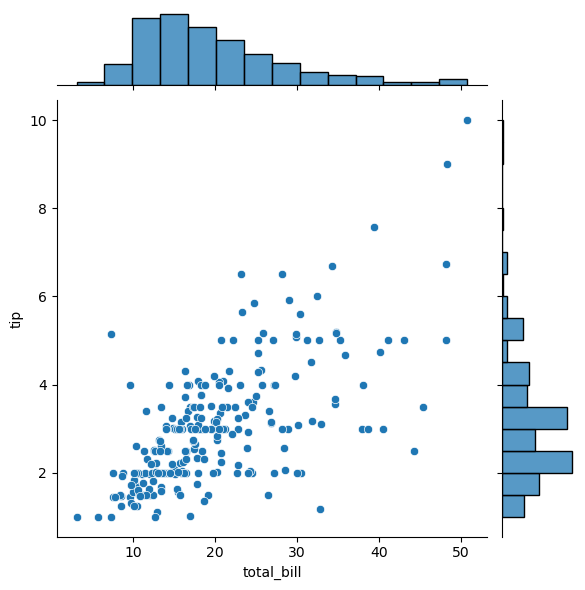

In [123]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter') # 2 makes 2 distplots compared to a scatterplot

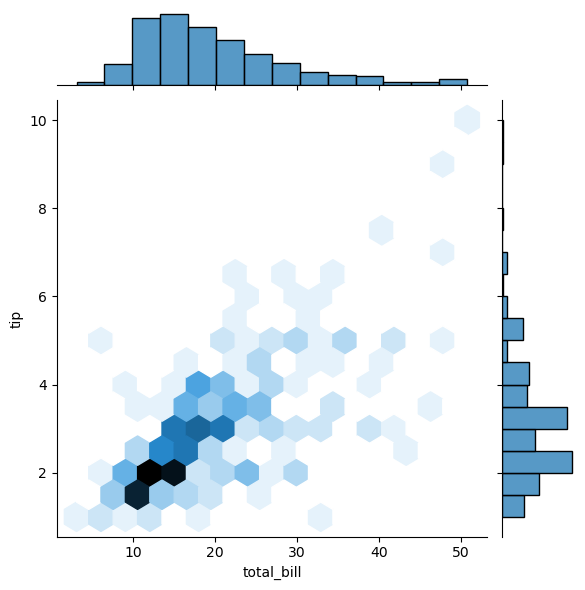

In [124]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') # makes 2 distplots compared to a histogram with hex bins

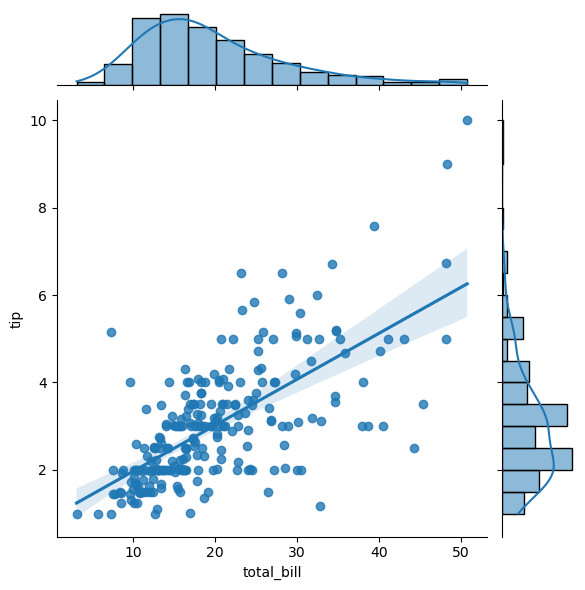

In [125]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') # same as previous but uses a linear regression fit and kde curves

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

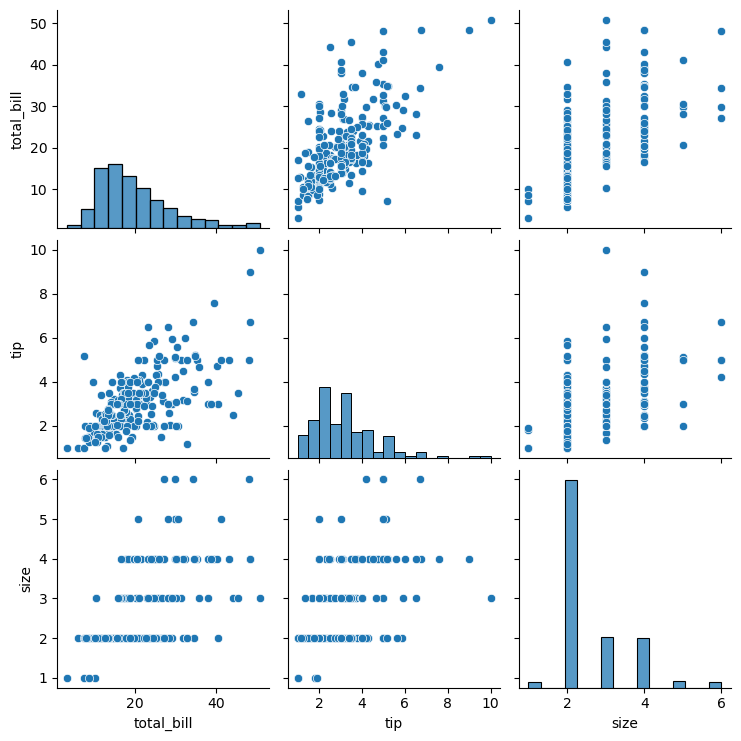

In [126]:
sns.pairplot(tips) # draws a number of relationships for all of the numerical features of a dataset

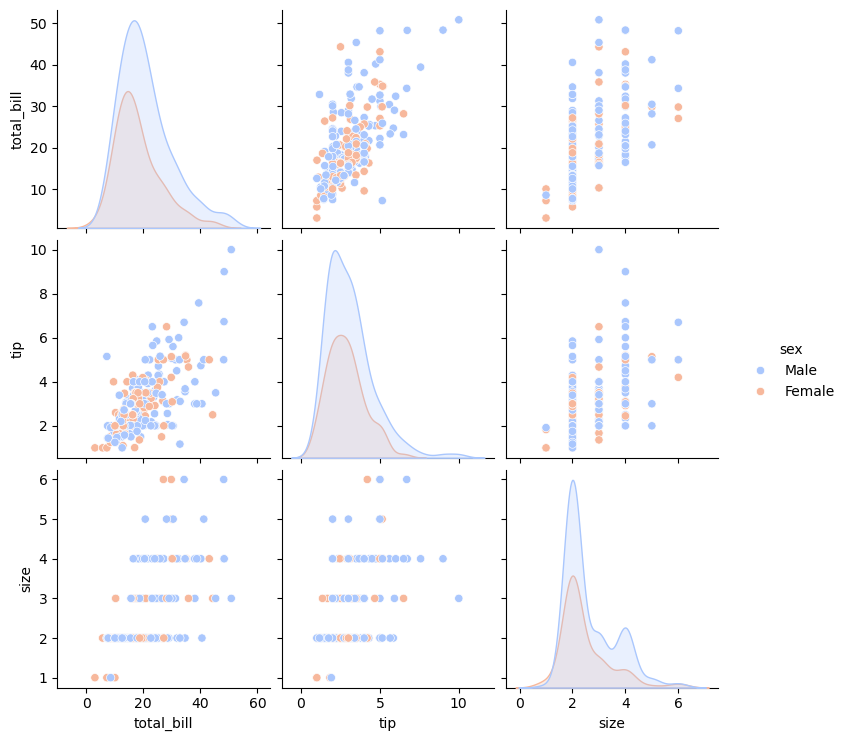

In [127]:
sns.pairplot(tips,hue='sex',palette='coolwarm') # same as above but also compares it with categories of a categorical feature, also pallete is used to chooes the preferred color scheme

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

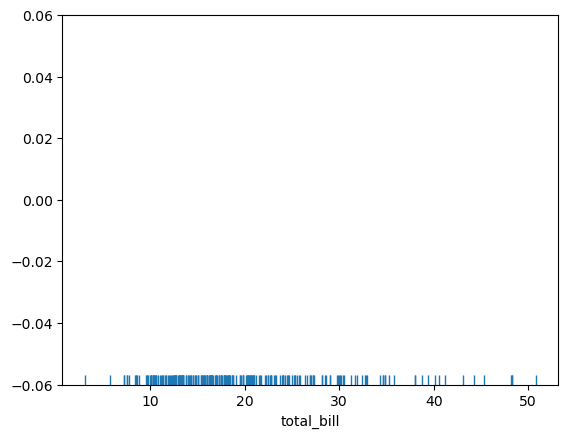

In [128]:
sns.rugplot(tips['total_bill']) # displays marginal distributions by placing ticks on the x and y axis, intended to support other plots since it is unobtrusive

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

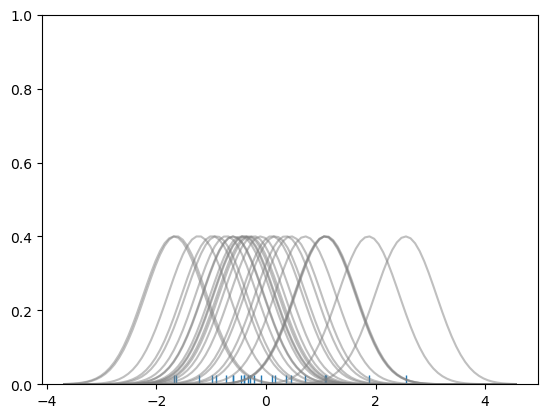

In [129]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25) # creates a dataset of 25 random numbers

# Create another rugplot
sns.rugplot(dataset); # creates a rugplot of previous dataset

# Set up the x-axis for the plot
x_min = dataset.min() - 2 # sets up the x axis to range from 2 points smaller to 2 points higher than interval of previous dataset
x_max = dataset.max() + 2 # same as above for max

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100) # creates 100 equally spaced points across the intervals

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2 # calculates how wide bell curves should be


# Create an empty kernel list
kernel_list = [] # this list will store value for each guassian kernel later

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)  
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1) # makes the y axis range from 0 to 1

Text(0.5, 0.98, 'Sum of the Basis Functions')

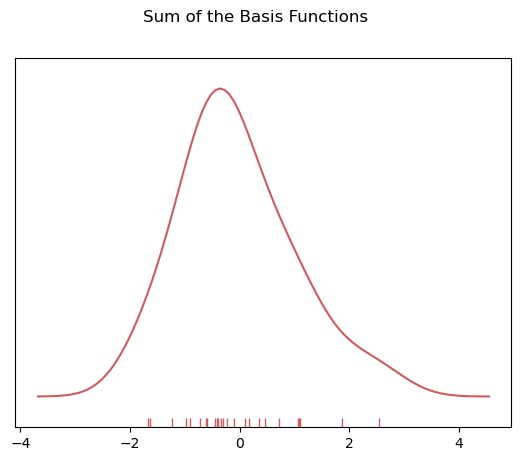

In [130]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

<Axes: xlabel='total_bill', ylabel='Density'>

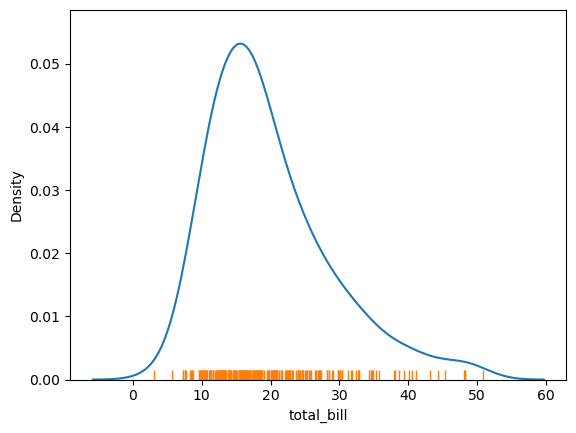

In [131]:
sns.kdeplot(tips['total_bill']) #kde plot for total bill
sns.rugplot(tips['total_bill']) # rugplot for total bill

<Axes: xlabel='tip', ylabel='Density'>

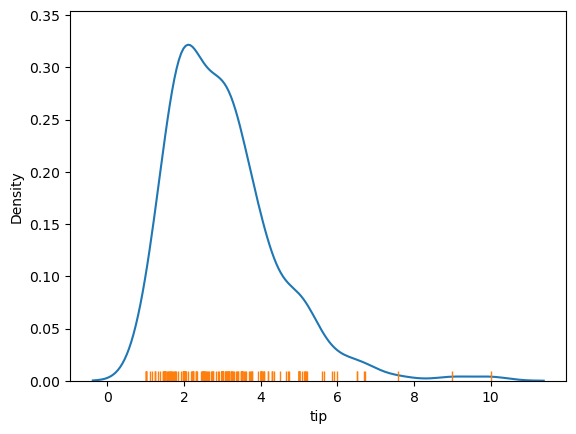

In [132]:
sns.kdeplot(tips['tip']) # same but for tips
sns.rugplot(tips['tip'])

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [133]:
import seaborn as sns # sns alias for seaborn lib
%matplotlib inline

In [134]:
tips = sns.load_dataset('tips') # load built in dataset tips
tips.head() # print first 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

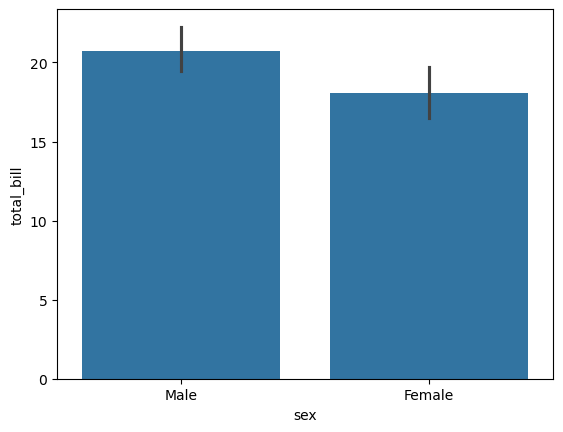

In [135]:
sns.barplot(x='sex',y='total_bill',data=tips) # create barplot to compare a numerical values mean across 2 categories

In [136]:
import numpy as np # np alias for numpy

You can change the estimator object to your own function, that converts a vector to a scalar:

<Axes: xlabel='sex', ylabel='total_bill'>

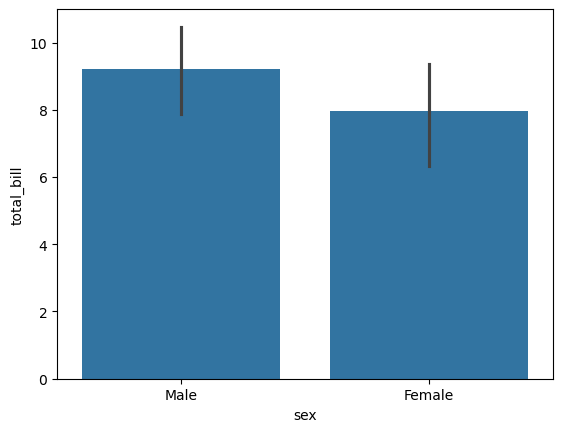

In [137]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) # same but uses estimator to get standard deviation instead

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

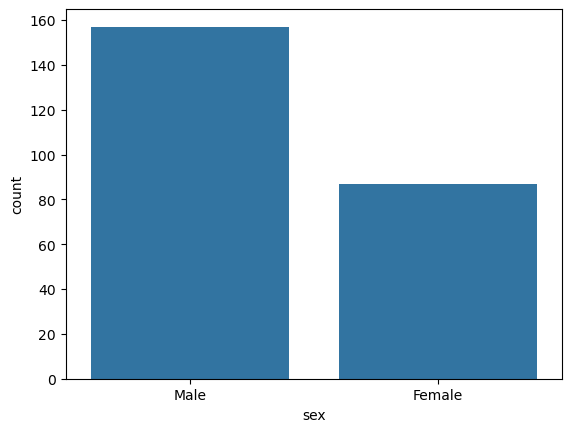

In [138]:
sns.countplot(x='sex',data=tips) # counts the number of occurences instead of mean

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<Axes: xlabel='day', ylabel='total_bill'>

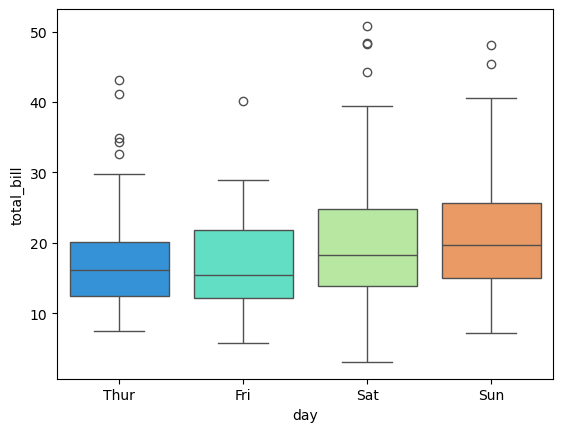

In [139]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow') # creates a boxplot to show distribution of numerical data across different categories

<Axes: >

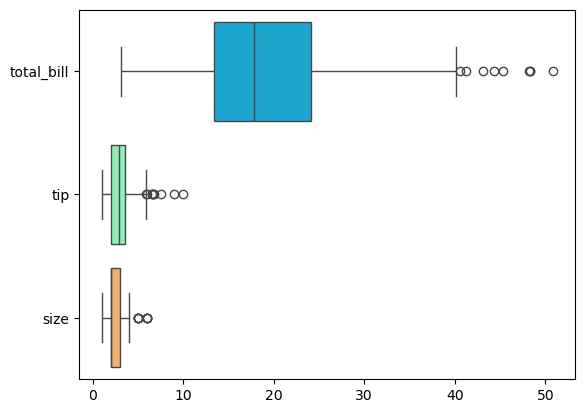

In [140]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h') # boxplot oriented horizontally

<Axes: xlabel='day', ylabel='total_bill'>

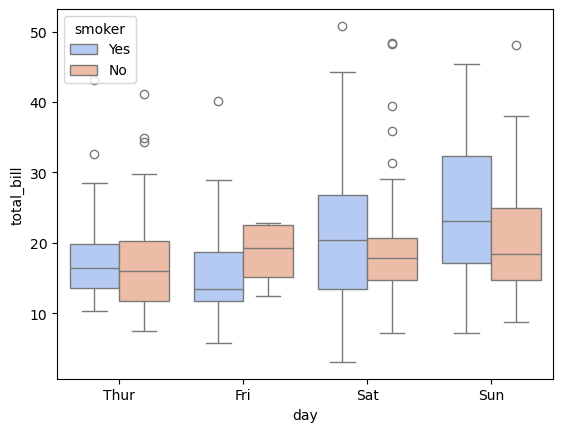

In [141]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm") # compares 2 categories

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<Axes: xlabel='day', ylabel='total_bill'>

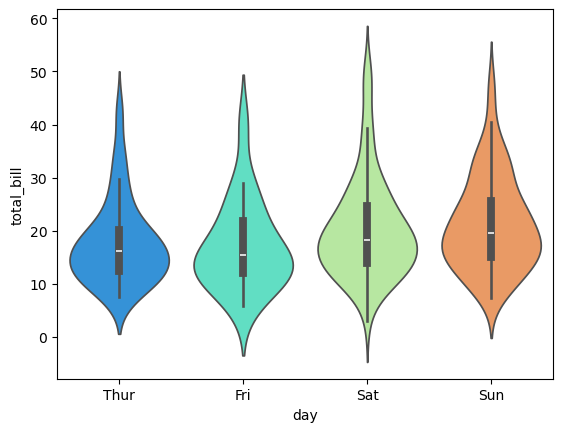

In [142]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow') # similar to boxplot but has kernel density estimation

<Axes: xlabel='day', ylabel='total_bill'>

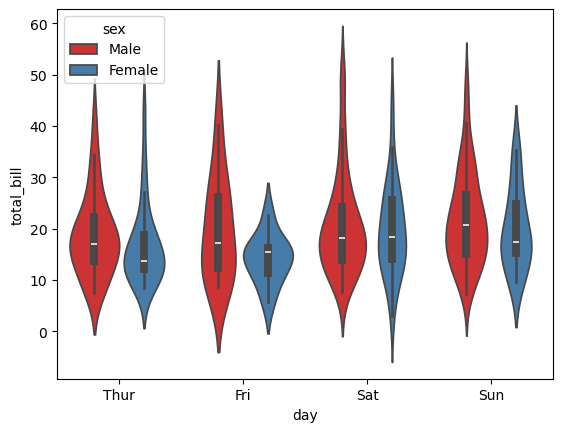

In [143]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1') # similar to above, but with different color pallete

<Axes: xlabel='day', ylabel='total_bill'>

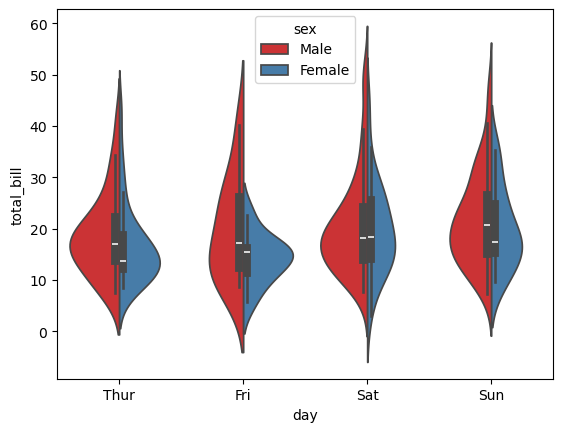

In [144]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1') # similar to above but instead of 2 violinplots the violinplot is split in the middle to show the two hues

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<Axes: xlabel='day', ylabel='total_bill'>

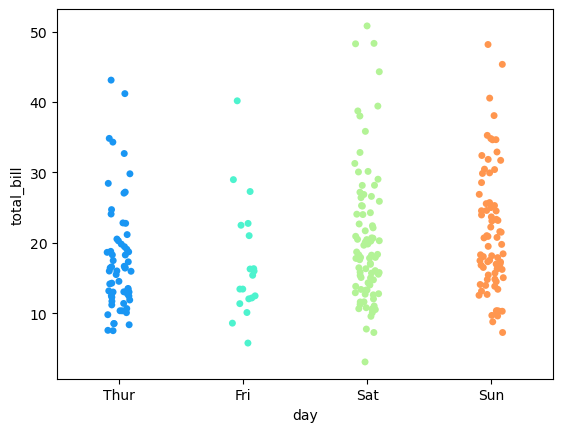

In [145]:
sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow') # similar to boxplot but does not draw the box and rather just the individual plots

<Axes: xlabel='day', ylabel='total_bill'>

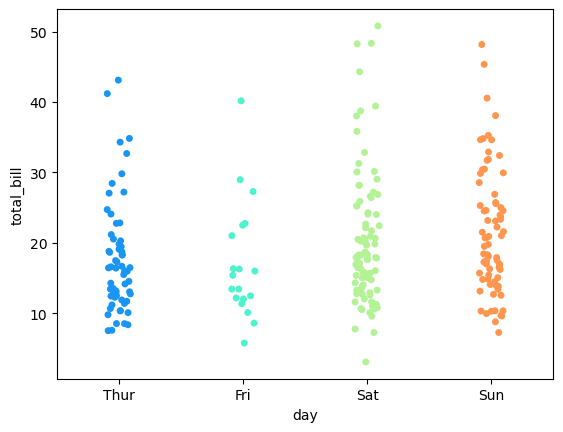

In [146]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, palette='rainbow') # jitter adds some horizontal deviation to make the dots easier to see

<Axes: xlabel='day', ylabel='total_bill'>

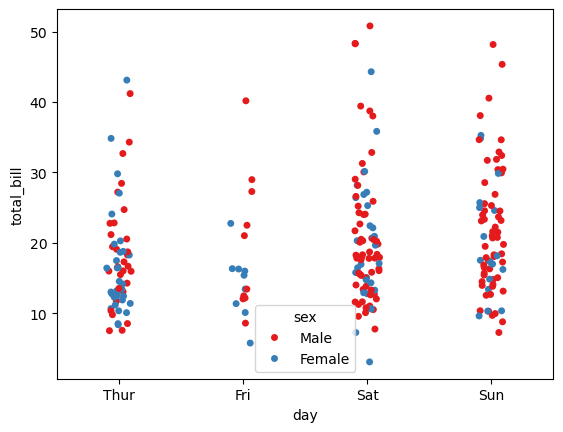

In [147]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1') # similar to above but with color palette and 2 categories

<Axes: xlabel='day', ylabel='total_bill'>

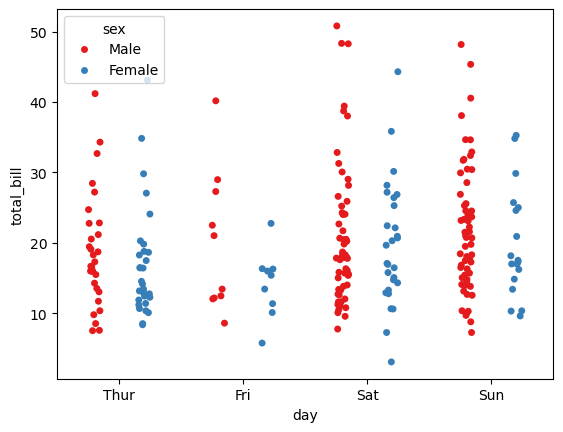

In [148]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',dodge=True) # ensures the hues do not intersect, so its easier to differentiate

<Axes: xlabel='day', ylabel='total_bill'>

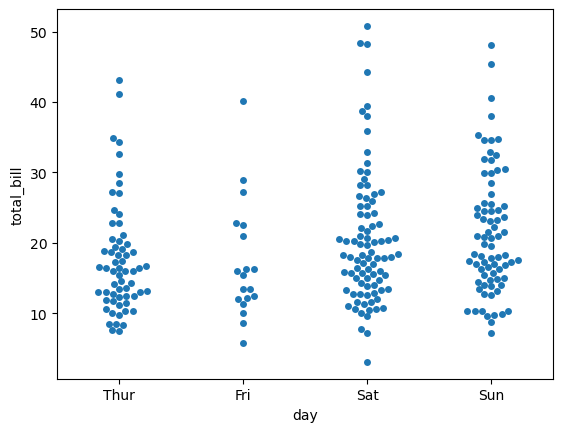

In [149]:
sns.swarmplot(x="day", y="total_bill", data=tips) # similar to stripplot but uses an algorithm to make sure that no datapoints overlap

### Combining Categorical Plots

<Axes: xlabel='tip', ylabel='day'>

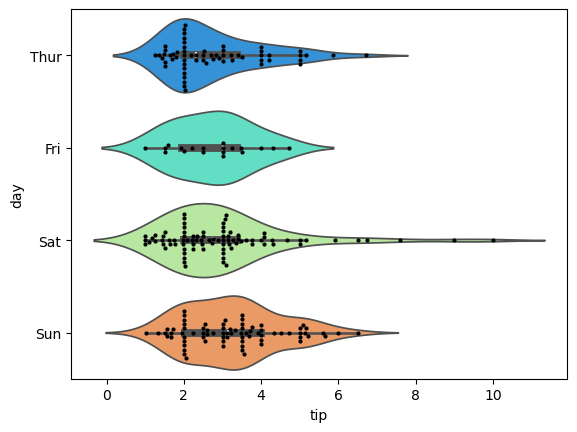

In [150]:
# creates a violinplot inside a swarmplot
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## catplot

factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

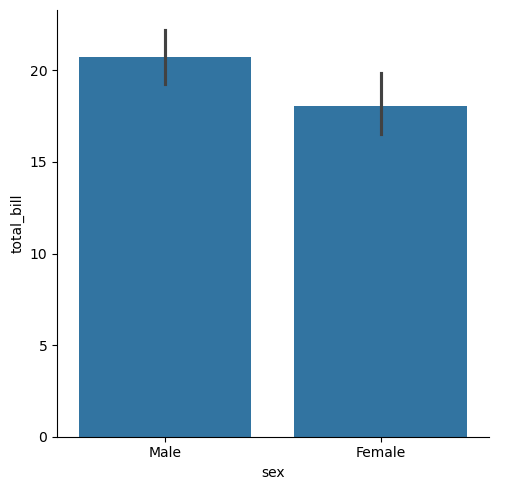

In [151]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar') # creates a categorical plot of type bar (similar to sns.barplot()), the height is the mean of the values per category while the black bars atop the bars represent the confidence interval

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [152]:
import seaborn as sns # sns alias for seaborn
%matplotlib inline

In [153]:
flights = sns.load_dataset('flights') # load flights inbuilt dataset

In [154]:
tips = sns.load_dataset('tips') # load tips inbuilt dataset

In [155]:
tips.head() # preview first 5 rows of tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [156]:
flights.head() # preview first 5 rows of flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [157]:
tips.head() # preview first 5 rows to ensure that they are in a matrix form to work for a heatmap

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [158]:
# Matrix form for correlation data
# tips.corr()
tips.corr(numeric_only=True) # edited above code to fix error with newer version of pandas. corr shows the strength of a relationship between columns, numeric_only makes pandas skip the non numerical columns to avoid errors
# future code with similar errors will all be edited to ensure they work with newer versions of pandas

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

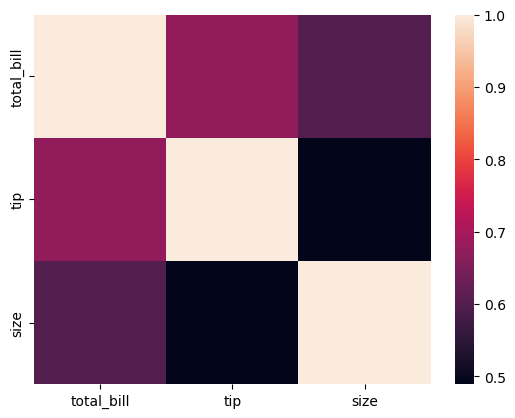

In [159]:
# sns.heatmap(tips.corr())
sns.heatmap(tips.corr(numeric_only=True)) # creates a heatmap of tips (shows the strength of correlations)

<Axes: >

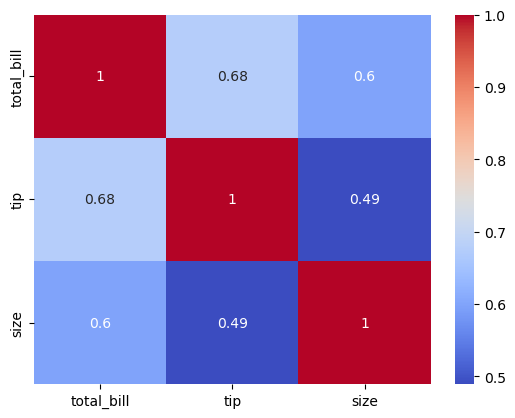

In [160]:
#sns.heatmap(tips.corr(),cmap='coolwarm',annot=True) 
sns.heatmap(tips.corr(numeric_only=True),cmap='coolwarm',annot=True)  # same as above, cmap changes colors and annot writes the numbers inside the squares

Or for the flights data:

In [161]:
flights.pivot_table(values='passengers',index='month',columns='year') # displays numerical data in relation to categorical rows and columns, values determines the numerical data to be analyzed with the row and column categories (index = row, columns = columns)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

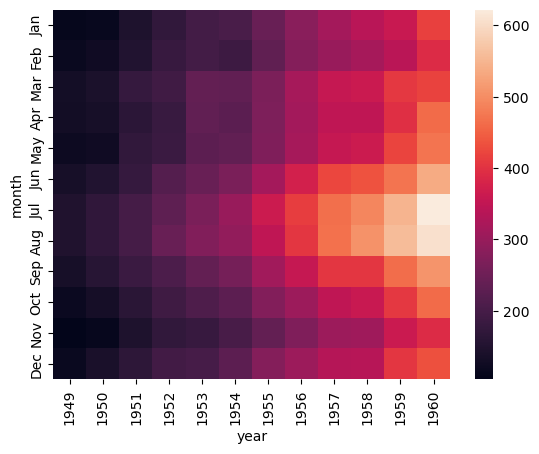

In [162]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights) # creates a heatmap of above pivot table

<Axes: xlabel='year', ylabel='month'>

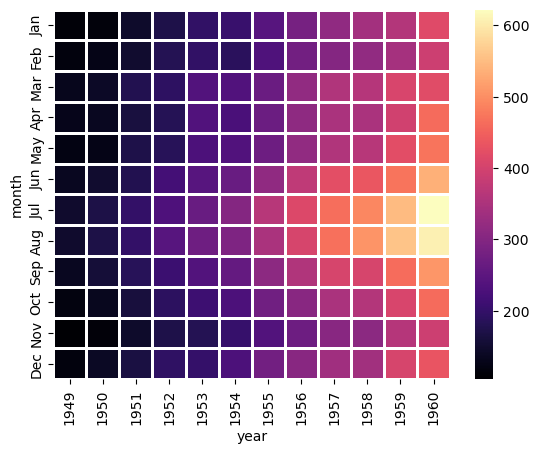

In [163]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1) # cmap = colors, linecolor = border color. linewidth = size of border around squares

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

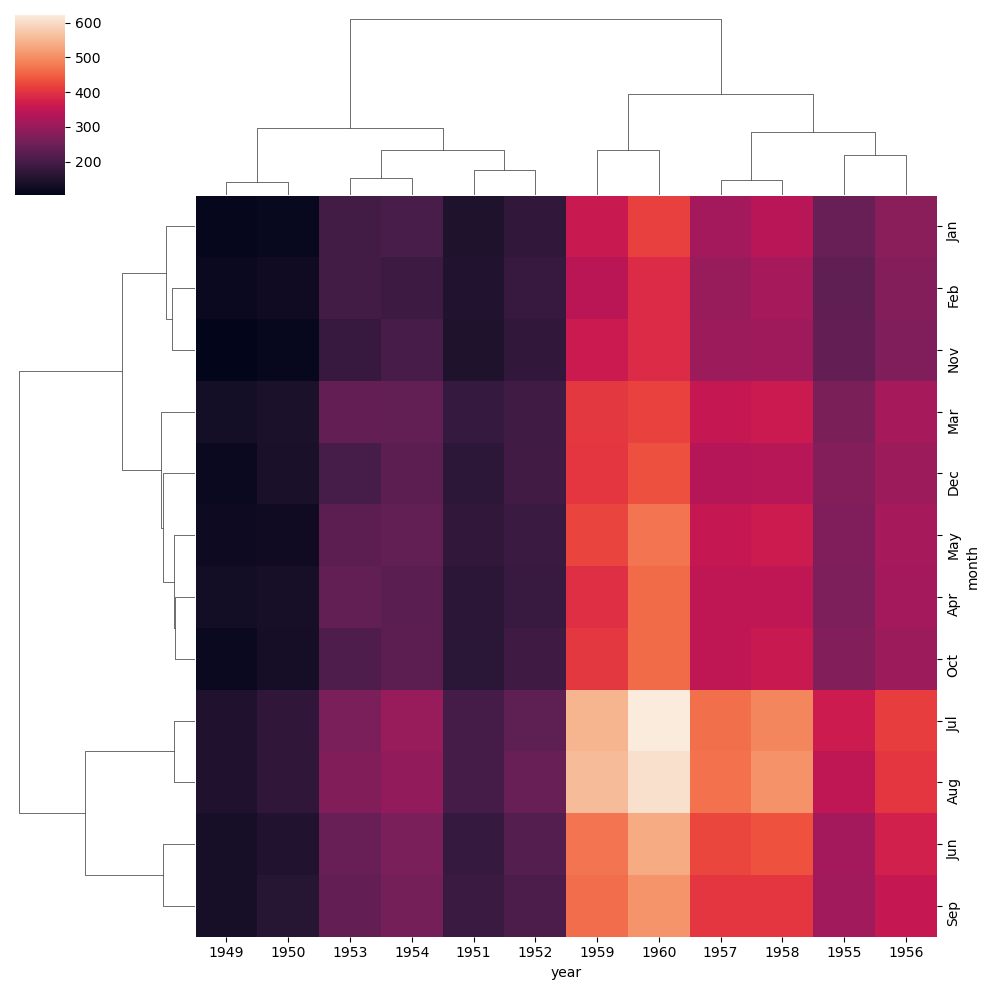

In [164]:
sns.clustermap(pvflights) # groups values with similar relational strengths together in rows and columns

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

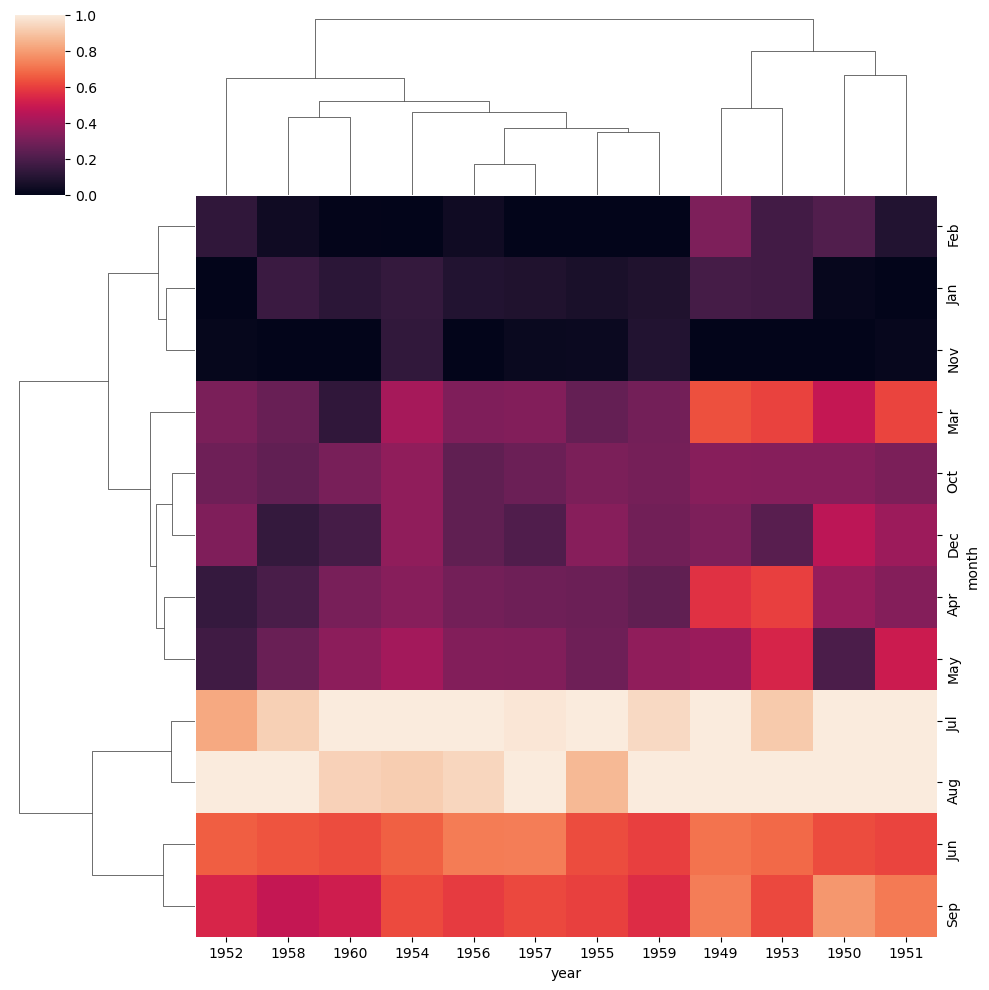

In [165]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,standard_scale=1) # standard scale normalizes data, min = 0 and max = 1

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [166]:
import seaborn as sns # sns alias for seaborn
%matplotlib inline

In [167]:
tips = sns.load_dataset('tips') # load tips dataset

In [168]:
tips.head() # preview first 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

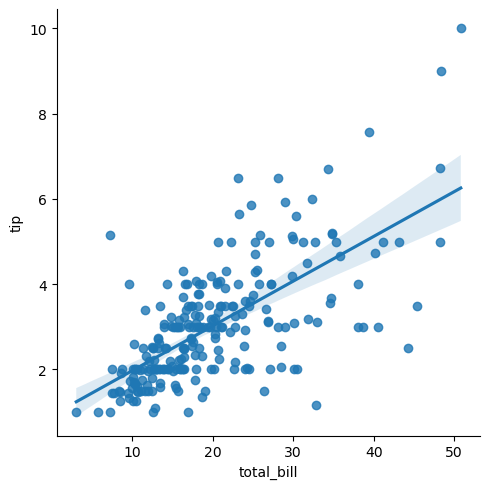

In [169]:
sns.lmplot(x='total_bill',y='tip',data=tips) # plots a scatterplot for bill and tips with a regerssion line overlayed along 

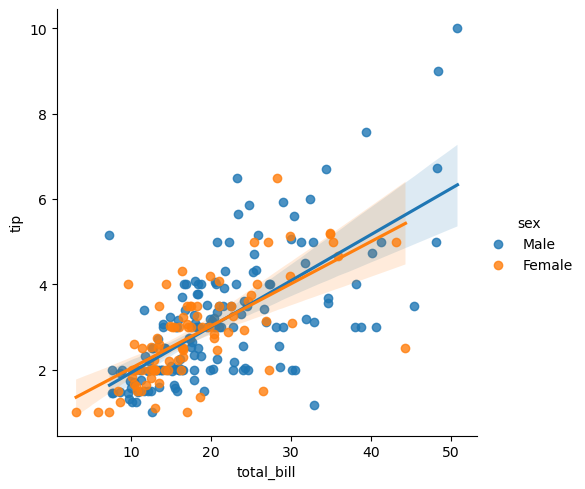

In [170]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex') # same as above, but compares the plot across hue category (in this case sex)

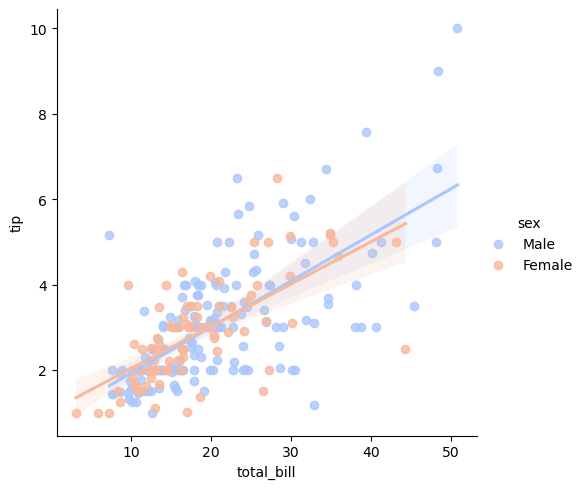

In [171]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm') # same as above, with a different colorpalette selected

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

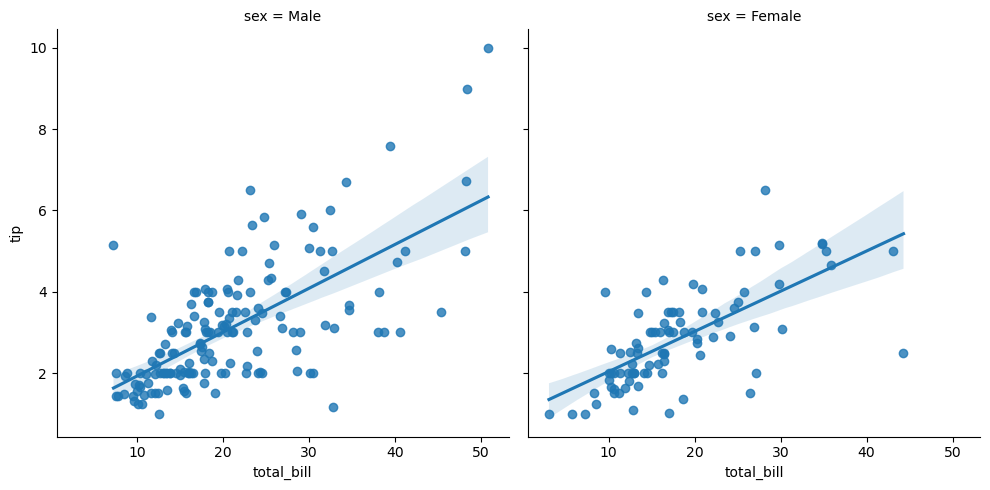

In [172]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex') # creates a grid comparing different categories of a categorical column (in this case sex)

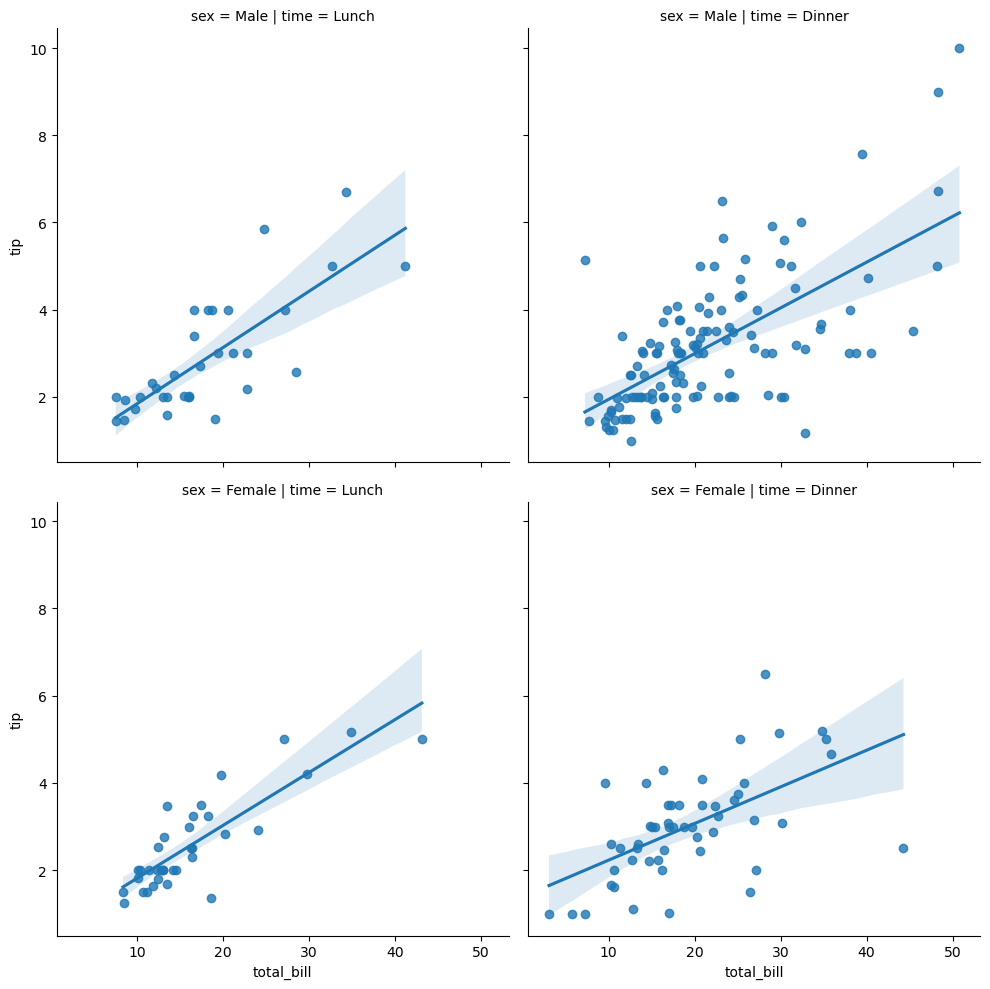

In [173]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips) # similar to above, with a row and a column this time

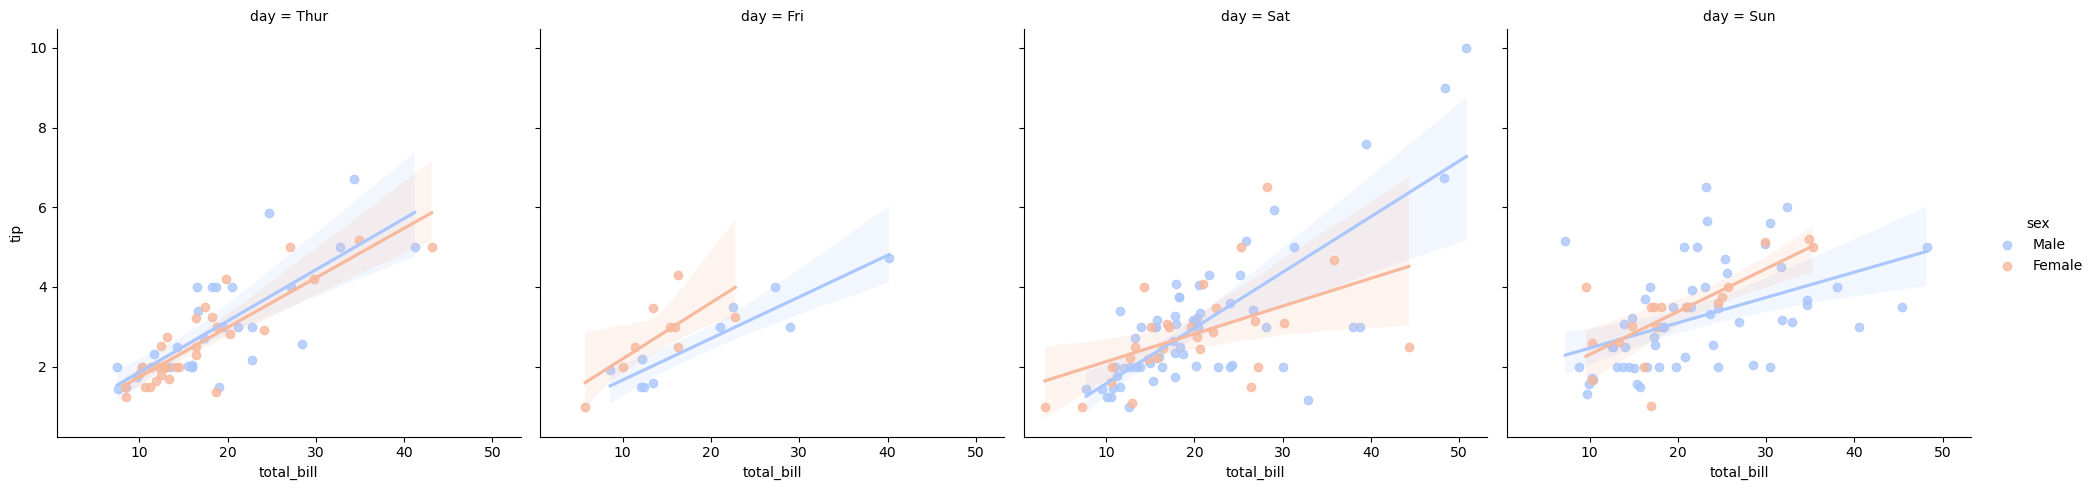

In [174]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm') # same as above but coolwarm colorpalette

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

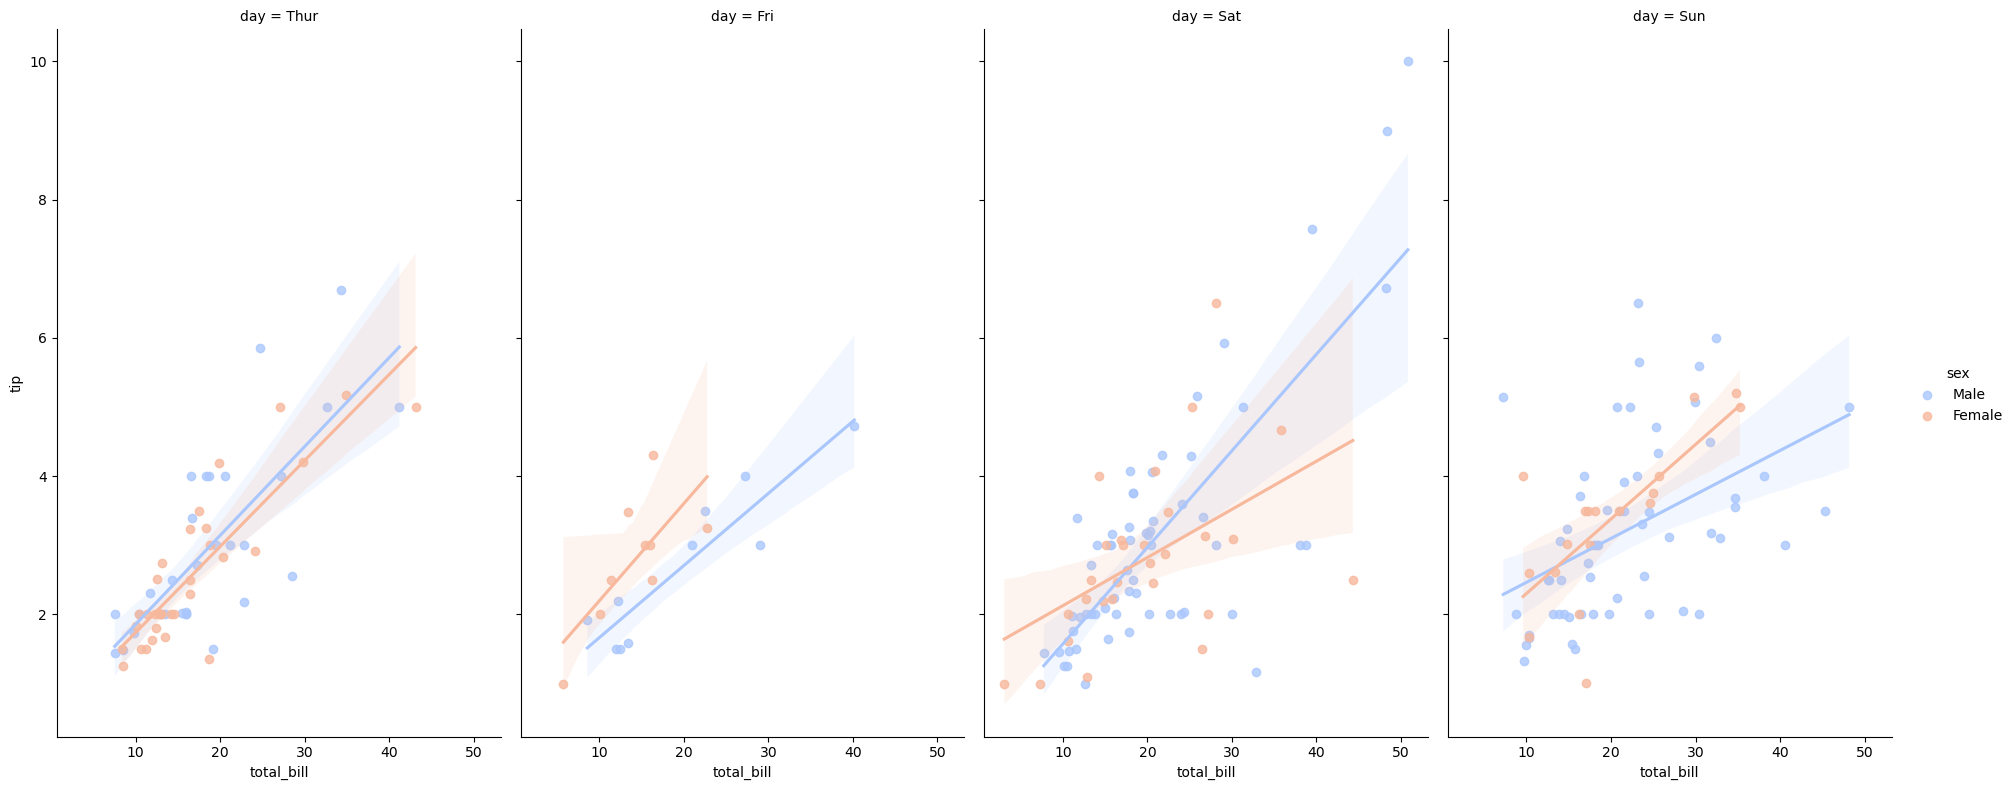

In [175]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,height=8) # adjust the aspect ratio (0.6 * 8) and height (8 inches)

### Reference:

* https://seaborn.pydata.org/ - Seaborn: statistical data visualization


* https://seaborn.pydata.org/tutorial/color_palettes.html - Color palettes